In [1]:
import pandas as pd
import numpy as np
import h5py
import sys 
import glob

import matplotlib.pyplot as plt
import scipy.io as sio

sys.path.append('/home/lugeon/eeg_project/scripts')


In [2]:
with np.load('/mlodata1/lugeon/dream_data/processed/healthy/images/H009.npz') as images:
    for k in images:
        print(k)

H009_E1_NREM_S03.img
H009_E1_NREM_S05.img
H009_E1_NREM_S06.img
H009_E1_NREM_S07.img
H009_E1_NREM_S09.img
H009_E1_REM_S04.img
H009_E1_REM_S08.img
H009_E1_REM_S12.img
H009_E2_NREM_S01.img
H009_E2_NREM_S07.img
H009_E2_NREM_S08.img
H009_E2_NREM_S09.img
H009_E1_NREM_S01.img
H009_E1_NREM_S02.img


In [4]:
with np.load('/home/lugeon/eeg_project/H009.npz') as images:
    h018 = images['H009_E1_REM_S12.img']

h018.shape

(237, 5, 32, 32)

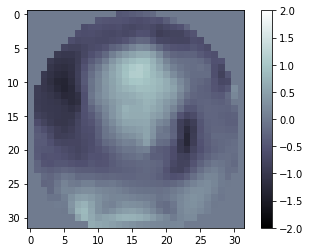

In [5]:
fig, ax = plt.subplots()
shw = ax.imshow(h018[3, 4, :, :], cmap='bone', vmin=-2, vmax=2);
bar = plt.colorbar(shw)

In [ ]:
fig, ax = plt.subplots()
shw = ax.imshow(h018[0, 1, :, :], cmap='bone', vmin=-2, vmax=2);
bar = plt.colorbar(shw)

In [ ]:
with h5py.File('/mlodata1/yuecetue/eeg-dreams/YuceturkThesis2020/Data/hdf5/32_32_FFT_data_all_bands_120s_20sbj_log_z-score_stages23') as f:
    for k in f:
        print(f[k])

In [4]:
with h5py.File('/mlodata1/lugeon/dream_data/processed/baseline/dataset_bis.h5') as f:
    for k in f:
        print(f[k])

    frame_id = f['frame_id'][:]
    subject_id = f['subject_id'][:]
    trial_id = f['trial_id'][:]
    images = f['images'][:]
    labels = f['labels'][:]
    sleep_cycle = f['sleep_cycle'][:]

<HDF5 dataset "frame_id": shape (46176,), type "<f4">
<HDF5 dataset "images": shape (46176, 5, 32, 32), type "<f4">
<HDF5 dataset "labels": shape (46176,), type "<f4">
<HDF5 dataset "sleep_cycle": shape (46176,), type "<f4">
<HDF5 dataset "sleep_stage": shape (46176,), type "<f4">
<HDF5 dataset "subject_id": shape (46176,), type "<f4">
<HDF5 dataset "subject_name": shape (1,), type "|S4">
<HDF5 dataset "trial_id": shape (46176,), type "<f4">


In [8]:
pd.DataFrame(sleep_cycle).value_counts()

2.0    14814
3.0    10614
4.0    10494
1.0    10254
dtype: int64

In [12]:
with h5py.File('/mlodata1/lugeon/dream_data/processed/healthy/dataset_small.h5') as f:

    df = pd.DataFrame({
                'sid': f['subject_id'][:], 
                'tid': f['trial_id'][:], 
                'fid': f['frame_id'][:],
                'ss': f['sleep_stage'][:]
                })

In [34]:
file_path = '/mlodata1/lugeon/dream_data/chuv/healthy/H009/H009_E1_NREM_S01.mat'
with h5py.File(file_path,'r') as file:
        for k in file:
                print(k)
        time_signal = np.array(file['subject'])

#refs#
chanlocs
condi
datavr
events
numseg
ordseg
reactime
srate
stage
subject


In [35]:
time_signal

array([[72],
       [48],
       [48],
       [57]], dtype=uint16)

In [14]:
file_path = '/mlodata1/lugeon/dream_data/chuv/healthy/M001/M001_E10_NREM_S4.mat'
sio.loadmat(file_path)['datavr_2min'].shape

(257, 60000)

In [6]:
np.append(np.arange(10), 20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 20])

In [2]:
import torch
from torch import nn
import importlib
sys.path.append('/home/lugeon/eeg_project/scripts')
from training.representation import models

/home/lugeon/miniconda3/envs/eeg-dream-conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
importlib.reload(models)

<module 'training.representation.models' from '/home/lugeon/eeg_project/scripts/training/representation/models/__init__.py'>

In [5]:
mae = models.MaskedAutoEncoder(
    in_channels = 1,
    space_dim = 2,
    time_dim = 2,
    space_patch_size = 1, 
    time_patch_size = 1,
    emb_size = 512, 
    masking_ratio = 0.5,
    encoder_depth = 8, 
    decoder_depth = 2,
)

device = torch.device('cpu')

In [6]:
input = (torch.ones(8) * 10 ** torch.arange(8)).view(2, 1, 2, 2).unsqueeze(0).repeat(2, 1, 1, 1, 1)
input

tensor([[[[[1.0000e+00, 1.0000e+01],
           [1.0000e+02, 1.0000e+03]]],


         [[[1.0000e+04, 1.0000e+05],
           [1.0000e+06, 1.0000e+07]]]],



        [[[[1.0000e+00, 1.0000e+01],
           [1.0000e+02, 1.0000e+03]]],


         [[[1.0000e+04, 1.0000e+05],
           [1.0000e+06, 1.0000e+07]]]]])

In [87]:
idx + torch.arange(n_patches)

RuntimeError: The size of tensor a (8) must match the size of tensor b (2) at non-singleton dimension 1

In [103]:
batch_size = 2
n_patches = 8
masking_ratio = 0.5
patches = mae.patch_encoder(input)

# shuffle patches independently for each element in the batch
r = torch.rand(batch_size, n_patches)
idx = torch.argsort(torch.rand(*r.shape), dim=-1)
offset = (torch.arange(batch_size) * n_patches).unsqueeze(1).repeat(1, n_patches)
idx += offset

idx = torch.flatten(idx)

shuffled = torch.flatten(patches, 0, 1)[idx, :] \
    .view(batch_size, n_patches, -1)
                
# keep only first patches 
n_masked = int(n_patches * masking_ratio)
keep = n_patches - n_masked
masked = shuffled[:, :keep, :]

n_masked = int(n_patches * masking_ratio)
mask_tokens = (torch.ones(1, 1, 512) * 1e10).repeat(batch_size, n_masked, 1)
shuffled = torch.cat((masked, mask_tokens), dim=1) # (batch_size, n_patches, emb_size)
shuffled = torch.flatten(shuffled, 0, 1)

In [104]:
for b in shuffled:
    print(b[:4].detach().numpy())

[ 41494.38     -379.2755 -99437.055    9309.795 ]
[ 4149394.5     -37973.652 -9943713.      930912.   ]
[ 415.3789     -3.331728 -994.2929     93.77302 ]
[ 414939.84     -3796.9463 -994371.2      93091.81  ]
[1.e+10 1.e+10 1.e+10 1.e+10]
[1.e+10 1.e+10 1.e+10 1.e+10]
[1.e+10 1.e+10 1.e+10 1.e+10]
[1.e+10 1.e+10 1.e+10 1.e+10]
[ 41494.38     -379.2755 -99437.055    9309.795 ]
[ 0.8544283   0.46188664 -0.91600645  0.77498114]
[ 4.1933430e+01  8.5942864e-02 -9.9358765e+01  9.9910030e+00]
[ 414939.84     -3796.9463 -994371.2      93091.81  ]
[1.e+10 1.e+10 1.e+10 1.e+10]
[1.e+10 1.e+10 1.e+10 1.e+10]
[1.e+10 1.e+10 1.e+10 1.e+10]
[1.e+10 1.e+10 1.e+10 1.e+10]


In [105]:
# unshuffle the patches w.r.t to shuffling indices
unshuffled = torch.zeros_like(shuffled)
unshuffled[idx] = shuffled

In [107]:
for b in unshuffled:
    print(b[:4].detach().numpy())

[1.e+10 1.e+10 1.e+10 1.e+10]
[1.e+10 1.e+10 1.e+10 1.e+10]
[1.e+10 1.e+10 1.e+10 1.e+10]
[ 415.3789     -3.331728 -994.2929     93.77302 ]
[1.e+10 1.e+10 1.e+10 1.e+10]
[ 41494.38     -379.2755 -99437.055    9309.795 ]
[ 414939.84     -3796.9463 -994371.2      93091.81  ]
[ 4149394.5     -37973.652 -9943713.      930912.   ]
[ 0.8544283   0.46188664 -0.91600645  0.77498114]
[1.e+10 1.e+10 1.e+10 1.e+10]
[ 4.1933430e+01  8.5942864e-02 -9.9358765e+01  9.9910030e+00]
[1.e+10 1.e+10 1.e+10 1.e+10]
[1.e+10 1.e+10 1.e+10 1.e+10]
[ 41494.38     -379.2755 -99437.055    9309.795 ]
[ 414939.84     -3796.9463 -994371.2      93091.81  ]
[1.e+10 1.e+10 1.e+10 1.e+10]


In [108]:
unshuffled = unshuffled.view(batch_size, n_patches, -1)

output = mae.patch_decoder(unshuffled)

In [110]:
output

tensor([[[[[ 3.8937e+09,  3.8937e+09],
           [ 3.8937e+09, -1.5263e+02]]],


         [[[ 3.8937e+09, -1.5234e+04],
           [-1.5234e+05, -1.5234e+06]]]],



        [[[[-4.4033e-01,  3.8937e+09],
           [-1.5522e+01,  3.8937e+09]]],


         [[[ 3.8937e+09, -1.5234e+04],
           [-1.5234e+05,  3.8937e+09]]]]], grad_fn=<PermuteBackward0>)

In [111]:
input

tensor([[[[[1.0000e+00, 1.0000e+01],
           [1.0000e+02, 1.0000e+03]]],


         [[[1.0000e+04, 1.0000e+05],
           [1.0000e+06, 1.0000e+07]]]],



        [[[[1.0000e+00, 1.0000e+01],
           [1.0000e+02, 1.0000e+03]]],


         [[[1.0000e+04, 1.0000e+05],
           [1.0000e+06, 1.0000e+07]]]]])

In [62]:
(unshuffled == patches)

tensor([[[ True,  True,  True,  ...,  True,  True,  True],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [ True,  True,  True,  ...,  True,  True,  True],
         [False, False, False,  ..., False, False, False],
         [ True,  True,  True,  ...,  True,  True,  True]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]])

In [7]:
patches = mae.patch_encoder(input)
output = mae.patch_decoder(patches)

In [8]:
output

tensor([[[[[-1.0688e-01,  1.6107e+00],
           [ 1.8787e+01,  1.9055e+02]]],


         [[[ 1.9082e+03,  1.9084e+04],
           [ 1.9085e+05,  1.9085e+06]]]],



        [[[[-1.0688e-01,  1.6107e+00],
           [ 1.8787e+01,  1.9055e+02]]],


         [[[ 1.9082e+03,  1.9084e+04],
           [ 1.9085e+05,  1.9085e+06]]]]], grad_fn=<PermuteBackward0>)

In [9]:
input

tensor([[[[[1.0000e+00, 1.0000e+01],
           [1.0000e+02, 1.0000e+03]]],


         [[[1.0000e+04, 1.0000e+05],
           [1.0000e+06, 1.0000e+07]]]],



        [[[[1.0000e+00, 1.0000e+01],
           [1.0000e+02, 1.0000e+03]]],


         [[[1.0000e+04, 1.0000e+05],
           [1.0000e+06, 1.0000e+07]]]]])

In [7]:

input = torch.ones(128, 10, 5, 32, 32).to(device)
mae.to(device)

output = mae(input)

In [9]:
patches, idx = mae.encode(input, return_idx=True)

In [13]:
idx.shape

torch.Size([40960])

In [8]:
output.shape

torch.Size([128, 10, 5, 32, 32])

In [176]:
video_patch_encoder = masked_autoencoder.VideoPatchEncoding(
    in_channels = 5, 
    space_patch_size = 4, 
    time_patch_size = 2,
    emb_size = 512)

pos_adder = masked_autoencoder.PositionalAdder(emb_size=512, time_n_patches=5, space_n_patches=64)
ts_pos = pos_adder.time_space_positions

transformer_encoder = masked_autoencoder.AttentionNet(emb_size=512, depth=8)

In [177]:
video_patch_encoder.to(device)

VideoPatchEncoding(
  (projection): Conv3d(5, 512, kernel_size=(2, 4, 4), stride=(2, 4, 4))
)

In [116]:
input = torch.ones(7, 10, 5, 32, 32)

patches = video_patch_encoder(input)
patches_pos = pos_adder(patches)

output = transformer_encoder(patches_pos)

In [117]:
output.size()

torch.Size([7, 320, 512])

In [118]:
patches_pos.shape

torch.Size([7, 320, 512])

In [121]:
video_patch_encoder = masked_autoencoder.VideoPatchEncoding(
    in_channels = 5, 
    space_patch_size = 4, 
    time_patch_size = 2,
    emb_size = 512)

pos_adder = masked_autoencoder.PositionalAdder(512, 5, 64)

video_patch_decoder = masked_autoencoder.VideoPatchDecoding(
    emb_size = 512,
    in_channels = 5, 
    space_dim = 32,
    time_dim = 10,
    space_patch_size = 4, 
    time_patch_size= 2,
)

In [123]:
x = video_patch_encoder(input)
x = pos_adder(x)
x = video_patch_decoder(x)

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.